<a href="https://colab.research.google.com/github/goktuggokmen/SVM-kNN-Classification/blob/main/Uygulama_6_SVM_kNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEM 314 Veri Madenciliğine Giriş**
# **Uygulama 6 : SVM-kNN Classification**


# **1. Kütüphanelerin Yüklenmesi**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from sklearn import svm
from pandas import Series,DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# **2. Support Vector Machine**

In [ ]:
train, target = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std = 0.6) #100 nokta oluşturup , bunları iki parçaya bölüyoruz ve standart sapmayı 0.6 olarak belirliyoruz.

In [ ]:
#modelin eğitilmesi
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(train, target)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

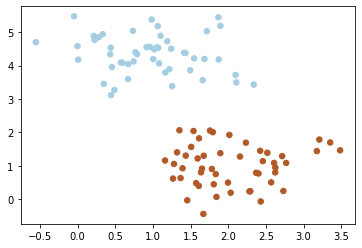

In [ ]:
#modelin görselleştirilmesi
plt.scatter(train[:, 0], train[:, 1], c=target, s=30, cmap=plt.cm.Paired) 

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(train, target)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
#karar sınırı ve marjlar
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
#destek vektörleri
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

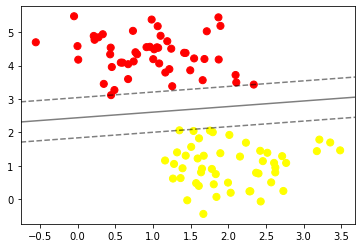

In [ ]:
plt.scatter(train[:, 0], train[:, 1], c=target, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
#karar çizgilerinin kestiği noktalar
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

# **3. k-NN**

In [ ]:
#eğitim ve test verilerinin alınması
X_train = train
Y_train = target

In [ ]:
#x,y eksen değer aralığı
xmin,xmax = train[:,0].min()-0.5,train[:,0].max()+0.5
ymin,ymax = train[:,1].min()-0.5,train[:,1].max()+0.5

x = np.arange(xmin,xmax,0.05)
y = np.arange(ymin,ymax,0.05)
xx,yy=np.meshgrid(x,y)

#test verisi
x_test=np.c_[xx.ravel(),yy.ravel()]

In [ ]:
#knn model
knnclf1 = KNeighborsClassifier(n_neighbors=1)
knnclf2 = KNeighborsClassifier(n_neighbors=3)
knnclf3 = KNeighborsClassifier(n_neighbors=5)
#logistic model
logistic = LogisticRegression()

In [ ]:
#modeli eğitme
knnclf1.fit(X_train,Y_train)
knnclf2.fit(X_train,Y_train)
knnclf3.fit(X_train,Y_train)
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#tahmin yapmak için eğitilmiş modeli kullanıyoruz 
y_pre_knn1 = knnclf1.predict(x_test)
y_pre_knn2 = knnclf2.predict(x_test)
y_pre_knn3 = knnclf3.predict(x_test)
y_pre_logistic = logistic.predict(x_test)

In [ ]:
#renkleri ayarlıyoruz
cmap = ListedColormap(['r','g','b'])

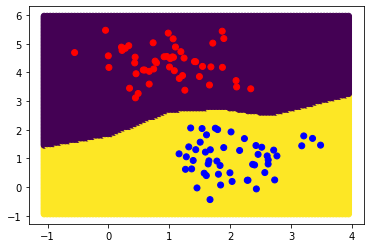

In [ ]:
#k-NN modelinin çizdirilmesi
#k = 1 için
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn1)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

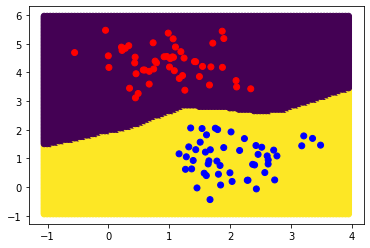

In [ ]:
#k = 3 için
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn2)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

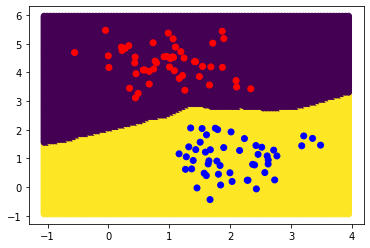

In [ ]:
#k = 5 için
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn3)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

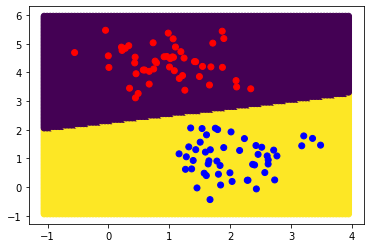

In [ ]:
#logistic reggresion modelinin çizdirilmesi
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_logistic)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)